# Task
Perform object detection using YOLOv8.

In [1]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n.pt') # Load the model
results = model.predict('/content/sample_data/california_housing_train.csv') # Use a valid image path

# Assuming 'results' contains the detection output, you can process it here.
# For example, printing the detected objects and their bounding boxes:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

    print("Detected Objects:")
    for box in boxes:
        print(f"  Class: {box.cls}, Confidence: {box.conf}, Bounding Box: {box.xyxy}")

FileNotFoundError: /content/sample_data/bus.jpg does not exist

Error fetching image: HTTPSConnectionPool(host='pie1006.ddns.net', port=443): Max retries exceeded with url: /axis-cgi/jpg/image.cgi?resolution=640x360&dummy=1756095301240 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)')))


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pie1006.ddns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Image sampled successfully.

0: 384x640 (no detections), 148.7ms
Speed: 2.1ms preprocess, 148.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Displaying object detection results with pyplot:


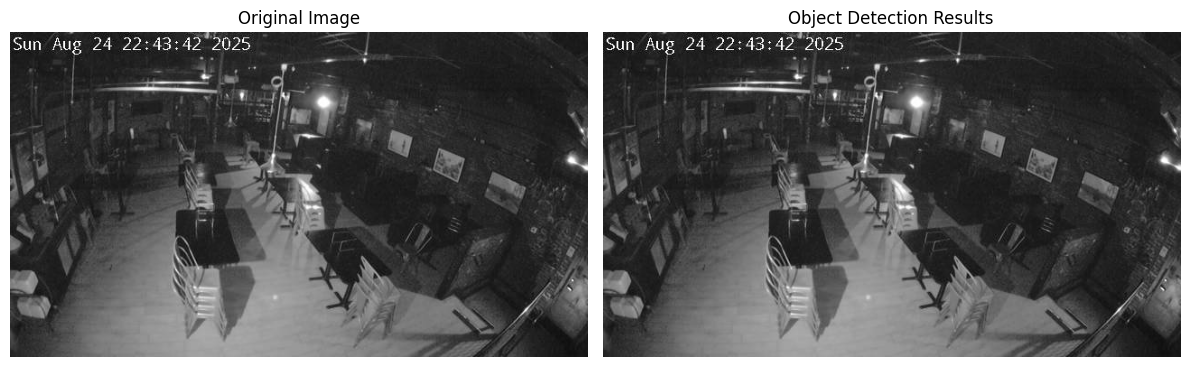

In [32]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt



url = "https://pie1006.ddns.net/axis-cgi/jpg/image.cgi?resolution=640x360&dummy=1756095301240"

try:
    #Request stream and ignore SSL certificate errors
    response = requests.get(url, verify=False)
    # Raise an exception for bad status codes
    response.raise_for_status()

    nparr = np.frombuffer(response.content, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)       #IN BGR FORMAT!

    if img is not None:
        print("Image sampled successfully.")

        model = YOLO('yolov8n.pt')

        #Perform obj detection
        results = model.predict(img)

        # Visualize the results using matplotlib
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Turn into RGB
        annotated_img = results[0].plot()

        # Convert images to RGB for displaying with matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #annotated_img_rgb = cv2.cvtColor(annotated_img_bgr, cv2.COLOR_BGR2RGB)


        print("Displaying object detection results with pyplot:")
        fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create a figure with 2 subplots
        ax[0].imshow(img_rgb)
        ax[0].set_title("Original Image")
        ax[0].axis('off') # Hide axes

        ax[1].imshow(annotated_img)
        ax[1].set_title("Object Detection Results")
        ax[1].axis('off') # Hide axes

        plt.tight_layout() # Adjust layout to prevent overlap
        plt.show() # Display the plot

    else:
        print("Error decoding image.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching image: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")